In [1]:
API=""


In [2]:
!pip install -q -U google-generativeai

In [7]:
import pathlib
import textwrap
import os
from IPython.display import Markdown

import google.generativeai as genai




In [99]:
def parse(text):
    return Markdown(textwrap.indent(text,'>',predicate= lambda _ : True))

In [8]:
genai.configure(api_key=API)

In [9]:
model=genai.GenerativeModel("gemini-pro")

In [118]:
response=model.generate_content("Write a 'Hello World!' Poem in 10 words.")

In [119]:
parse(response.text)

>In digital realm, a journey unfurls, with 'Hello World!', a new dawn swirls.

In [15]:
import PIL.Image

In [110]:
img=PIL.Image.open("food.jpg")

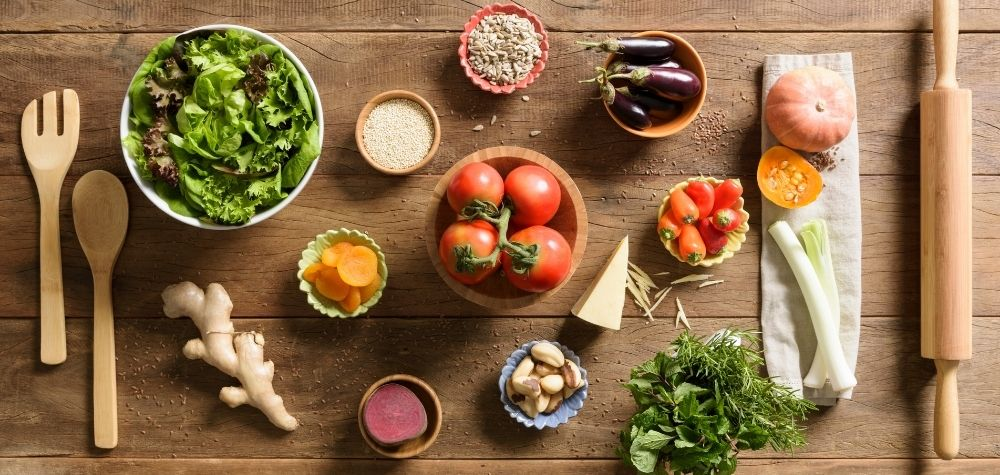

In [111]:
img

In [18]:
visionmodel=genai.GenerativeModel("gemini-pro-vision")

In [120]:
response=visionmodel.generate_content(img)

In [121]:
parse(response.text)

> This is a picture of a variety of healthy foods, including fruits, vegetables, grains, and legumes. There are also some cooking utensils and spices shown in the picture. The background is a wooden table. The image is taken from a top-down perspective.

In [114]:
def queryimage(model,prompt,img):
    response=model.generate_content([prompt,img])
    response.resolve()
    return (parse(response.text),response.text)
def querytext(model,prompt):
    #print(prompt)
    response=model.generate_content(prompt)
    return parse(response.text)   

In [122]:
prompt="Describe ingredients you can see."
#prompt="What is the text in the image? what is the image about?"
#prompt="Describe everything you see in the image, list out everything from text to objects, specify names and dont miss any element."
out,txt=queryimage(visionmodel,prompt,img)

In [123]:
out

> I can see tomatoes, lettuce, ginger, pumpkin, eggplant, carrot, nuts, seeds, and herbs.

In [124]:
querytext(model,f"Using some of the following ingredients, suggest the multiple recipes to cook. Ingredients:{txt}")

>1. **Roasted Pumpkin and Carrot Soup**:
>   - Roast pumpkin, carrots, and ginger in the oven until tender.
>   - Blend into a soup with vegetable stock and seasonings.
>   - Garnish with roasted nuts and herbs.
>
>2. **Eggplant and Tomato Stir-Fry**:
>   - Slice eggplant and tomatoes.
>   - Stir-fry with ginger, garlic, and soy sauce.
>   - Serve over rice or noodles.
>
>3. **Stuffed Eggplant**:
>   - Halve eggplants and scoop out the flesh.
>   - Chop the flesh and mix with nuts, seeds, herbs, and spices.
>   - Stuff the mixture back into the eggplant shells and bake until tender.
>
>4. **Tomato and Herb Salad**:
>   - Slice tomatoes and arrange on a platter.
>   - Sprinkle with chopped nuts, seeds, herbs, and olive oil.
>   - Serve with grilled bread or crackers.
>
>5. **Carrot and Ginger Dressing**:
>   - Combine grated carrots, ginger, vinegar, honey, and olive oil in a blender.
>   - Puree until smooth and use as a salad dressing or marinade.
>
>6. **Lettuce Wraps with Roasted Pumpkin and Nuts**:
>   - Roast pumpkin with olive oil and herbs.
>   - Fill lettuce leaves with pumpkin, roasted nuts, and your favorite fresh herbs.
>   - Serve with a drizzle of sesame oil or light soy sauce.